In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras import layers, models, callbacks, optimizers
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error,r2_score
import math

In [2]:
path = '/Users/HP Spectre/OneDrive - student.kit.edu/uni/Master/Lissabon Kurse/Intelligent Systems/IntSysGroup6/'

data = pd.read_csv(path+'Project/data/robot_inverse_kinematics_dataset.csv')

X = data.iloc[:,6:].to_numpy()
y = data.iloc[:,0:5].to_numpy()

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(X)
y = scaler_Y.fit_transform(y)

print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)

(15000, 5)


In [3]:
model = tf.keras.Sequential([
        layers.Input(shape=(3,)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dense(5)
])

 
initial_learning_rate = 0.001
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,  # Adjust this value
    decay_rate=0.5,  # Adjust this value
    staircase=True
)
callbacks.LearningRateScheduler(lr_schedule)


model.compile(loss='mean_squared_error',
              optimizer=optimizers.Adam(learning_rate=lr_schedule,
                                        weight_decay=0.01))

In [4]:
early_stopping = callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(
          X_train,
          y_train,
          validation_split=0.2,
          verbose=1,
          batch_size=32,
          epochs=10,
          callbacks=[])

Epoch 1/10
300/300 [==============================] - 3s 4ms/step - loss: 0.0882 - val_loss: 0.0781
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0771 - val_loss: 0.0754
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0750 - val_loss: 0.0745
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0736 - val_loss: 0.0730
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0727 - val_loss: 0.0728
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0724 - val_loss: 0.0725
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0720 - val_loss: 0.0719
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0716 - val_loss: 0.0715
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0713 - val_loss: 0.0717
Epoch 10/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0710 - val_loss: 0.0718

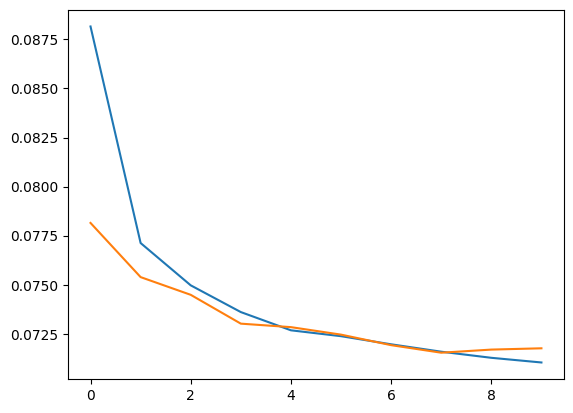

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [6]:
y_pred = model.predict(X_test)
print("MAE Absolute: " ,mean_absolute_error(y_test, y_pred))
y_pred = scaler_Y.inverse_transform(y_pred)
y_test = scaler_Y.inverse_transform(y_test)
print("MAE in deg ",mean_absolute_error(np.degrees(y_test), np.degrees(y_pred)))
print("MAE in deg ",math.degrees(mean_absolute_error(y_test, y_pred)))

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2*100)
plt.show()

94/94 [==============================] - 0s 3ms/step
MAE Absolute:  0.22480242591671845
MAE in deg  53.82313758255066
MAE in deg  53.82313744137925
R-squared (R2) Score: 15.592553001444529


In [7]:
# Save Model
import joblib

model_filename = "Project/MLT_tuning/MLP_worst_modl.pkl"
path= '/Users/HP Spectre/OneDrive - student.kit.edu/uni/Master/Lissabon Kurse/Intelligent Systems/IntSysGroup6/'

joblib.dump(model, path+model_filename)

['/Users/HP Spectre/OneDrive - student.kit.edu/uni/Master/Lissabon Kurse/Intelligent Systems/IntSysGroup6/Project/MLT_tuning/MLP_worst_modl.pkl']